In [2]:

import numpy as np
import matplotlib.pyplot as plt
# If you need to import from a local utils.py, uncomment and adjust the following lines:
import sys
import os
import jax.numpy as jnp
# Construct the full path to the folder
folder_path = r'C:\Users\Petrb\Desktop\DTU\3rdSemester\02477_BAYESIAN_MACHINE_LEARNING'

# Add the folder to the Python path
sys.path.append(folder_path)

# Now you can import the utils module
from utils import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

## Part 1: Multi-class classification

Consider the following linear model for multi-class classification with $ K = 3 $ classes:

$$
y_n | \mathbf{f}_n \sim \text{Categorical}(\text{softmax}(\mathbf{f}_n)), \tag{1}
$$

$$
\mathbf{f}_n = \mathbf{W} \phi(x_n), \tag{2}
$$

$$
W_{ij} \sim \mathcal{N}(0, \alpha^{-1}), \tag{3}
$$

where $ y_n \in \{1,2,3\} $, $ x_n \in \mathbb{R} $, $ \alpha > 0 $ is a hyperparameter, and $ \mathbf{W} $ are the parameters of interest. The feature transformation $ \phi(x) $ is given by $ \phi(x) = \begin{bmatrix} 1 & x \end{bmatrix}^T $ such that $ \mathbf{W} \in \mathbb{R}^{K \times D} $ for $ D = 2 $.

---

### Question 1.1: Identify the prior and likelihood of the model.



### Answer 1.1 

The prior distributions represents our belief about the model parameters before observing any data. 
In the following model: 
- The prior distribution is given as $p(W) = \prod_{ij} \mathcal{N}(W_{ij} | 0, \alpha^{-1})$, which is a Gaussian distribution with mean 0 and variance $\alpha^{-1}$ for each element of the weight matrix $W$.
- The likelihood is given by $p(y_n | f_n) = \text{Categorical}(\text{softmax}(f_n))$, which describes the probability of observing the class label $y_n$ given the linear transformation of the input $x_n$ through the weight matrix $W$ and the feature transformation $\phi(x)$. There is also alternative $p(y_n | W) = Categorical(\text{softmax}(W \phi(x_n)))$ which is the same as the previous one.

Let

$$
\hat{\mathbf{W}}_{\text{MAP}} = \begin{bmatrix}
-0.5 & -2.0 \\
3.0 & 0.0 \\
1.0 & 1.0
\end{bmatrix} \tag{4}
$$

be a MAP-estimator for the model given in eq. (1)–(3) for some dataset $ \mathcal{D} $ (not given).

---

### Question 1.2: Use the plugin approximation with $ \hat{\mathbf{W}}_{\text{MAP}} $ to compute the posterior predictive distribution for $ x^* = -1 $.


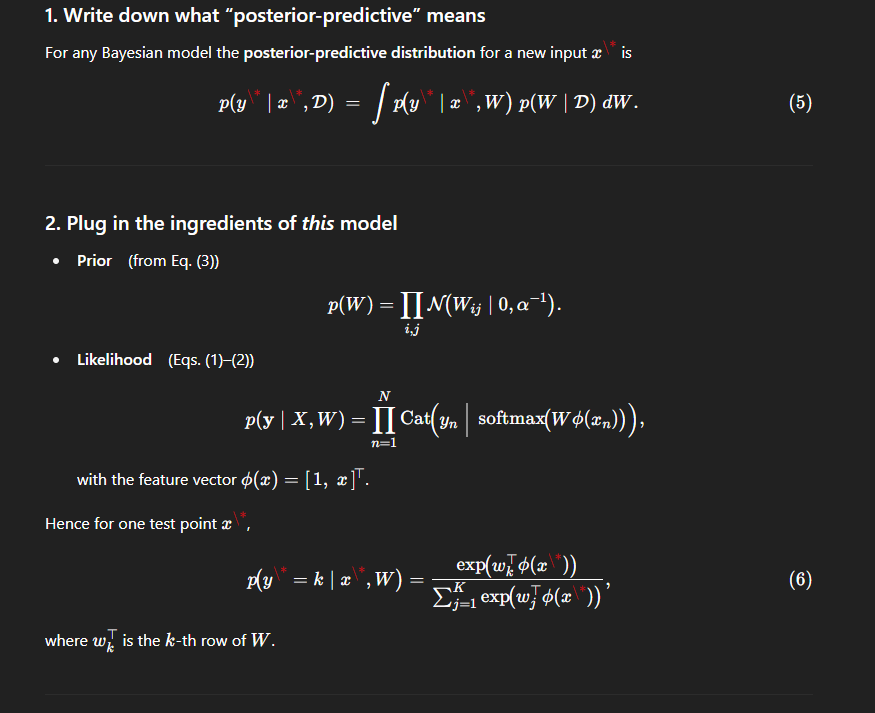

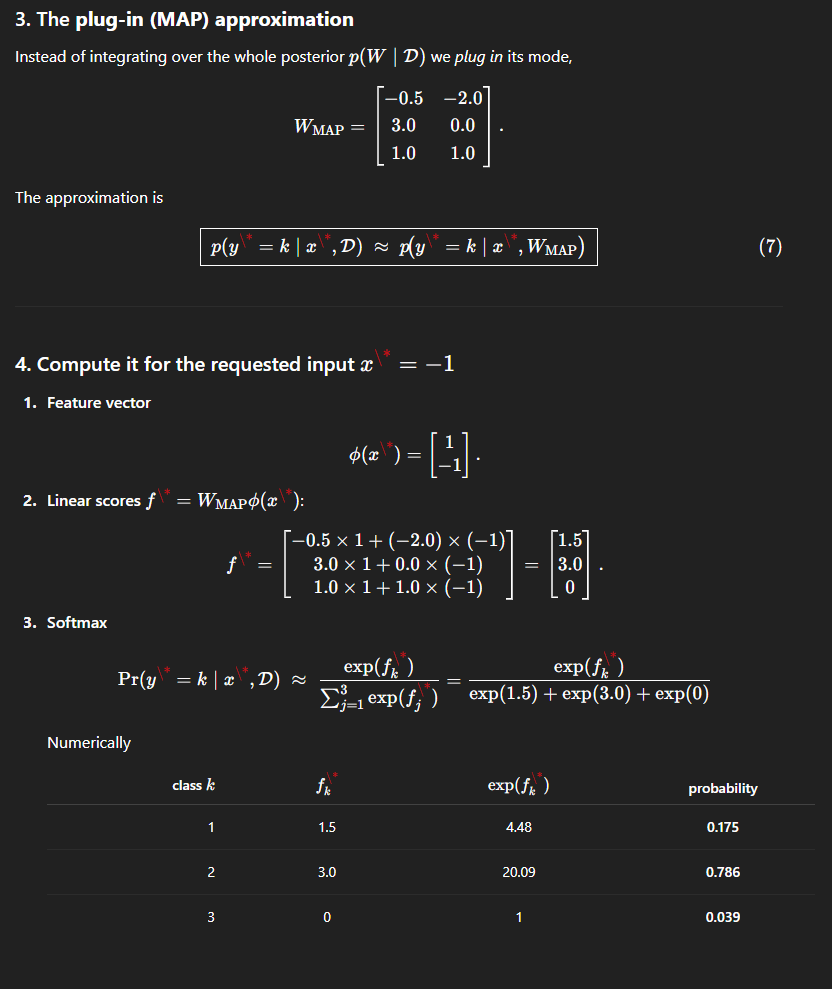

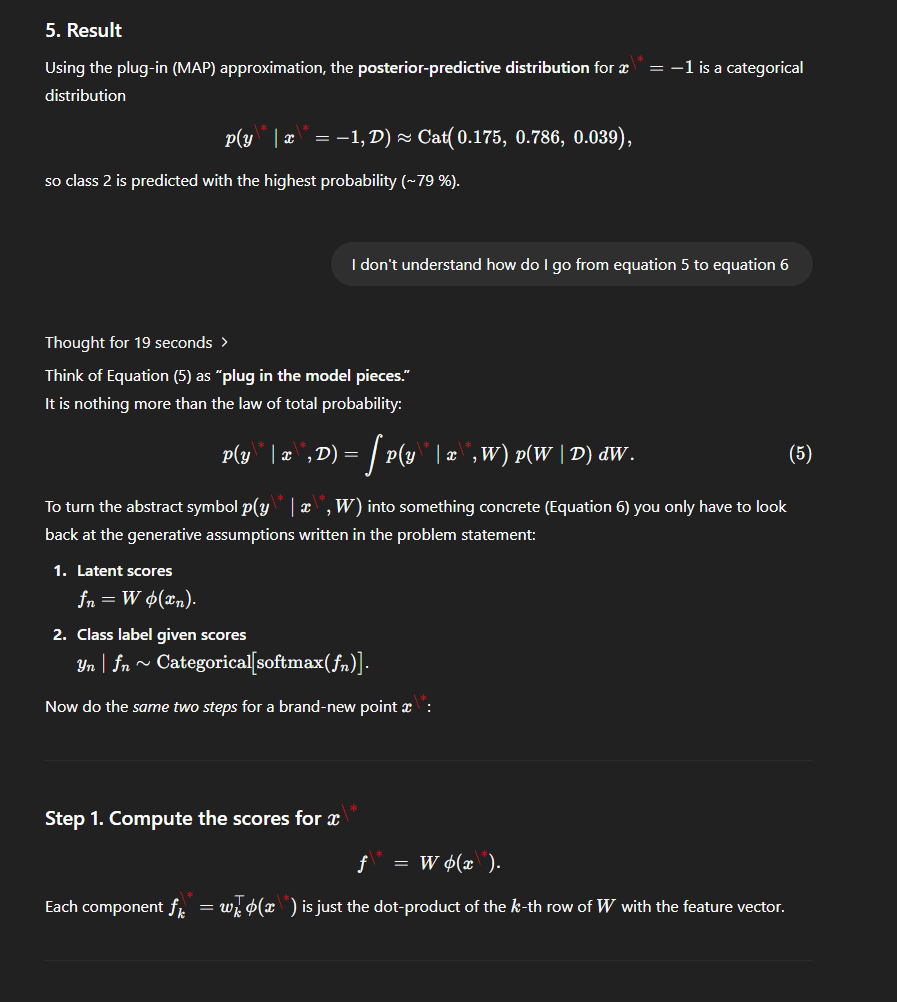

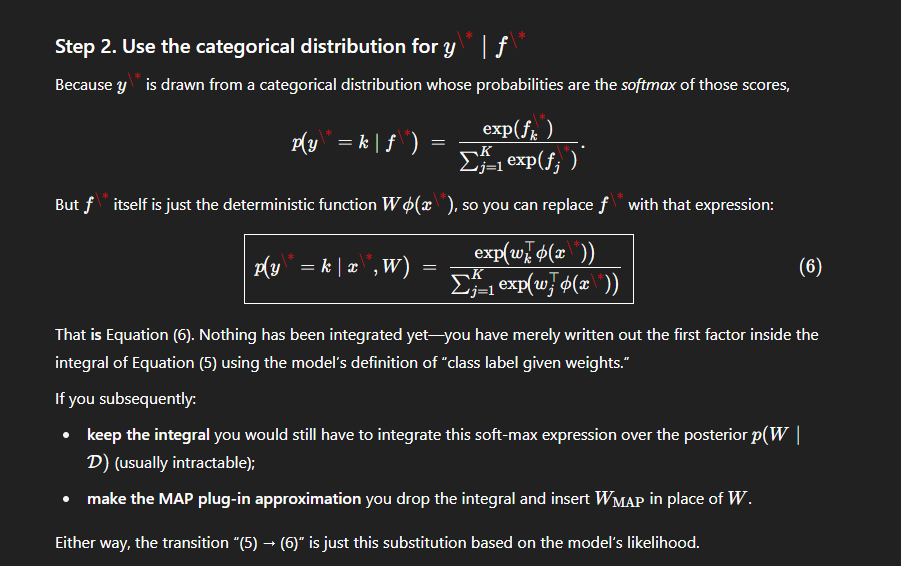

In [6]:
# MAP-estimator for the weights (Eq. 4)
w_MAP = jnp.array([[-0.5, -2], 
                   [3.0, 0.0], 
                   [1.0, 1.0]])
print(f"w_MAP: \n{w_MAP}")
print(f"w_MAP shape: {w_MAP.shape}")  # (3, 2): (num_classes, num_features)

# Test input
x_star = -1.0

def phi(x):
    """
    Feature transformation φ(x) = [1, x]^T
    Input: x (float or array of shape ())
    Output: shape (2,)
    """
    return jnp.array([1, x])

# Compute the linear model output for x_star
# Equation: f* = W_MAP @ φ(x*)
pred = w_MAP @ phi(x_star)
print(f"Pred for x_star: {pred}")           # shape: (3,)
print(f"Pred for x_star shape: {pred.shape}")

# Softmax function to get class probabilities
# Equation: p(y*|x*, D) = softmax(f*)
softmax = lambda x: jnp.exp(x) / jnp.sum(jnp.exp(x))

probs = softmax(pred)
print(f"Posterior predictive probabilities: {probs}")  # shape: (3,)

# Output:
# w_MAP: 
# [[-0.5 -2. ]
#  [ 3.   0. ]
#  [ 1.   1. ]]
# w_MAP shape: (3, 2)
# Pred for x_star: [1.5 3.  0. ]
# Pred for x_star shape: (3,)
# Posterior predictive probabilities: [0.1553624  0.69846535 0.14617223]


w_MAP: 
[[-0.5 -2. ]
 [ 3.   0. ]
 [ 1.   1. ]]
w_MAP shape: (3, 2)
Pred for x_star: [1.5 3.  0. ]
Pred for x_star shape: (3,)
Posterior predictive probabilities: [0.17529039 0.785597   0.03911257]


___________________
Let $ \mathbf{W}^{(i)} \sim q(\mathbf{W}) $ for $ i = 1, 2, 3 $ be samples from a variational approximation of the posterior, i.e. $ p(\mathbf{W}|\mathcal{D}) \approx q(\mathbf{W}) $:

$$
\mathbf{W}^{(1)} = \begin{bmatrix}
-0.15 & -1.92 \\
3.2 & 0.45 \\
1.37 & 0.8
\end{bmatrix}, \quad
\mathbf{W}^{(2)} = \begin{bmatrix}
-0.31 & -2.03 \\
2.98 & 0.08 \\
1.03 & 1.29
\end{bmatrix}, \quad
\mathbf{W}^{(3)} = \begin{bmatrix}
-0.35 & -1.98 \\
3.09 & 0.07 \\
1.3 & 0.96
\end{bmatrix}. \tag{5}
$$



### Question 1.3: Compute a Monte Carlo estimate of the posterior predictive distribution for $ x^* = -1 $ using samples given above.

Here is a detailed comment you can add:

---

**Detailed Explanation:**  
To compute a Monte Carlo estimate of the posterior predictive distribution for $x^* = -1$, we use the following approach:

1. **Draw Samples from the Posterior:**  
    We are given three samples $\mathbf{W}^{(1)}, \mathbf{W}^{(2)}, \mathbf{W}^{(3)}$ from a variational approximation $q(\mathbf{W})$ to the true posterior $p(\mathbf{W}|\mathcal{D})$.

2. **Compute Predictive Probabilities for Each Sample:**  
    For each sampled weight matrix $\mathbf{W}^{(i)}$, we:
    - Compute the feature vector $\phi(x^*) = [1, x^*]^T$.
    - Calculate the linear output $\mathbf{f}^* = \mathbf{W}^{(i)} \phi(x^*)$.
    - Apply the softmax function to $\mathbf{f}^*$ to obtain the class probabilities $p^{(i)}(y^*|x^*, \mathbf{W}^{(i)})$.

3. **Monte Carlo Estimate:**  
    The posterior predictive distribution is approximated by averaging the predictive probabilities over all samples:
    $$
    p(y^*|x^*, \mathcal{D}) \approx \frac{1}{3} \sum_{i=1}^3 p^{(i)}(y^*|x^*, \mathbf{W}^{(i)})
    $$
    This gives an empirical estimate of the predictive distribution by integrating over the posterior using the samples.

This approach captures both the uncertainty in the model parameters (via the samples) and the inherent uncertainty in the predictions (via the softmax probabilities).

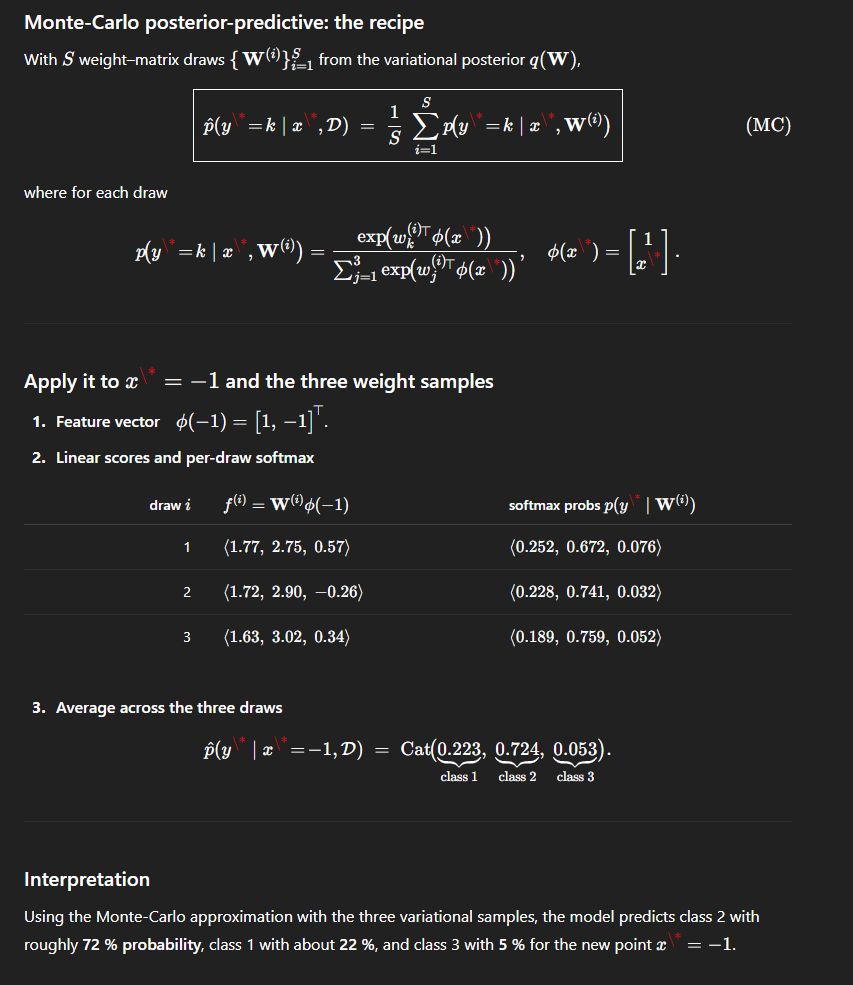

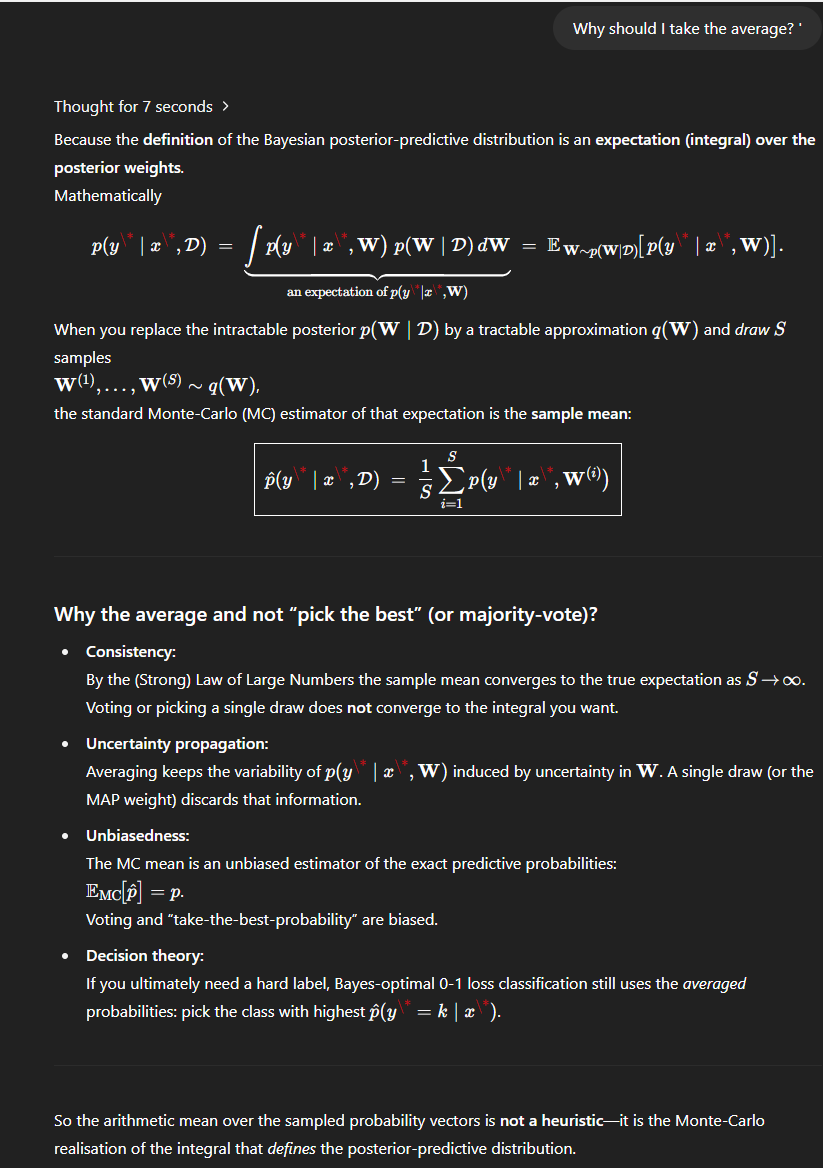

In [12]:
w_1 = jnp.array([[-0.15, -1.92], [3.2, 0.45], [1.37, 0.8]])
w_2 = jnp.array([[-0.31, -2.03], [2.98, 0.08], [1.03, 1.29]])
w_3 = jnp.array([[-0.35, -1.98], [3.09, 0.07], [1.3, 0.96]])


list_of_weights = [w_1, w_2, w_3]

def phi(x):
    return jnp.array([1, x])


probs = []


for i in range(3):
    pred = list_of_weights[i] @ phi(x_star)  # Compute the prediction for x_star using the weights w_MAP
    print(f"Pred for x_star: {pred}")  # shape: (3,)
    probs.append(softmax(pred))

print(f"Probs: {np.mean(probs, axis=0)}")

Pred for x_star: [1.77 2.75 0.57]
Pred for x_star: [ 1.72  2.9  -0.26]
Pred for x_star: [1.63       3.02       0.33999997]
Probs: [0.2229536  0.72390676 0.05313967]


The predictive distribution $ p(y^* | \mathcal{D}, x^* = 3) $ is given in the table below:

| $ k $ | $ p(y^* = k \mid x^*) $ |
|--------|---------------------------|
| 1      | 0.00                      |
| 2      | 0.27                      |
| 3      | 0.73                      |

---

### Question 1.4: Determine the entropy and confidence of the posterior predictive distribution for $ x^* = 3 $ given in the table above.

---


In [13]:
def confidence(p):
    """
    Computes the confidence for each predictive distribution.

    The confidence is defined as the maximum predicted probability for each sample:
        confidence(x^*) = max_k p(y^*=k | x^*, D)
    where D is the training data.

    Parameters
    ----------
    p : jax.numpy.ndarray
        Posterior predictive probabilities for each sample and class.
        Shape: (N, K), where N is the number of prediction points and K is the number of classes.

    Returns
    -------
    conf : jax.numpy.ndarray
        Confidence for each prediction point.
        Shape: (N,)

    Equation
    --------
    conf_n = max_k p_{n,k}
    """
    return jnp.max(p, axis=1)

def entropy(p):
    """
    Computes the predictive entropy for each predictive distribution.

    The entropy measures the uncertainty of the predictive distribution:
        entropy(x^*) = -sum_k p(y^*=k | x^*, D) * log(p(y^*=k | x^*, D))

    Parameters
    ----------
    p : jax.numpy.ndarray
        Posterior predictive probabilities for each sample and class.
        Shape: (N, K), where N is the number of prediction points and K is the number of classes.

    Returns
    -------
    ent : jax.numpy.ndarray
        Predictive entropy for each prediction point.
        Shape: (N,)

    Equation
    --------
    ent_n = -sum_k p_{n,k} * log(p_{n,k})
    """
    # Use jnp.where to avoid log(0) by only computing log where p > 0
    return -jnp.sum(jnp.where(p > 0, p * jnp.log(p), 0.0), axis=1)


In [15]:
# p_hat is the posterior predictive probabilities for x* = 3, shape (1, 3)
p_hat = jnp.array([0.0, 0.27, 0.73]).reshape(1, 3)  
print(f"p_hat: {p_hat}")                # shape: (1, 3)
print(f"p_hat shape: {p_hat.shape}")

# Compute confidence
# Input: p_hat (shape: (1, 3)), Output: confidence (shape: (1,))
conf = confidence(p_hat)
print(f"Confidence: {conf}")

# Compute entropy
# Input: p_hat (shape: (1, 3)), Output: entropy (shape: (1,))
ent = entropy(p_hat)
print(f"Entropy: {ent}")

p_hat: [[0.   0.27 0.73]]
p_hat shape: (1, 3)
Confidence: [0.73]
Entropy: [0.58325887]


---

### Question 1.5: Suppose the value of the hyperparameter $ \alpha $ is increased by a factor of 10. Explain in your own words how you would expect the MAP-estimate to change and why.
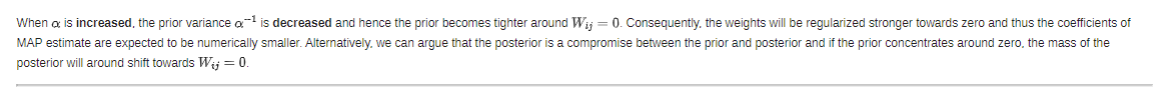

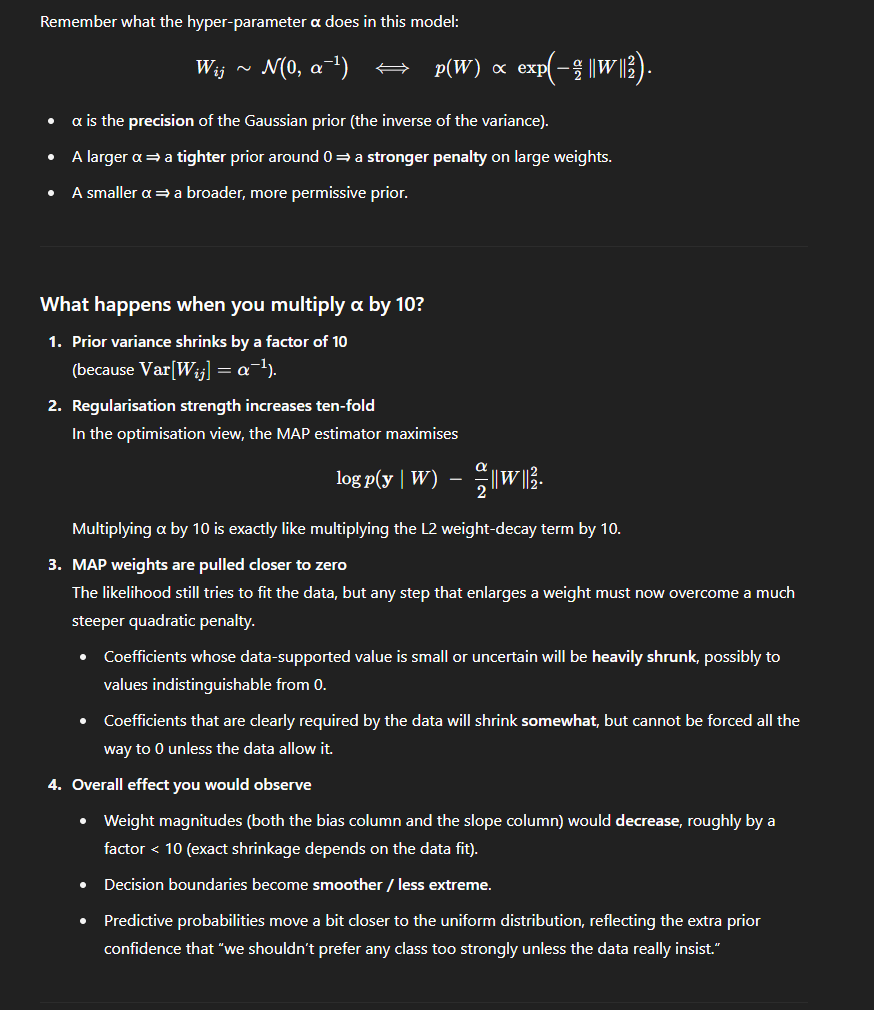

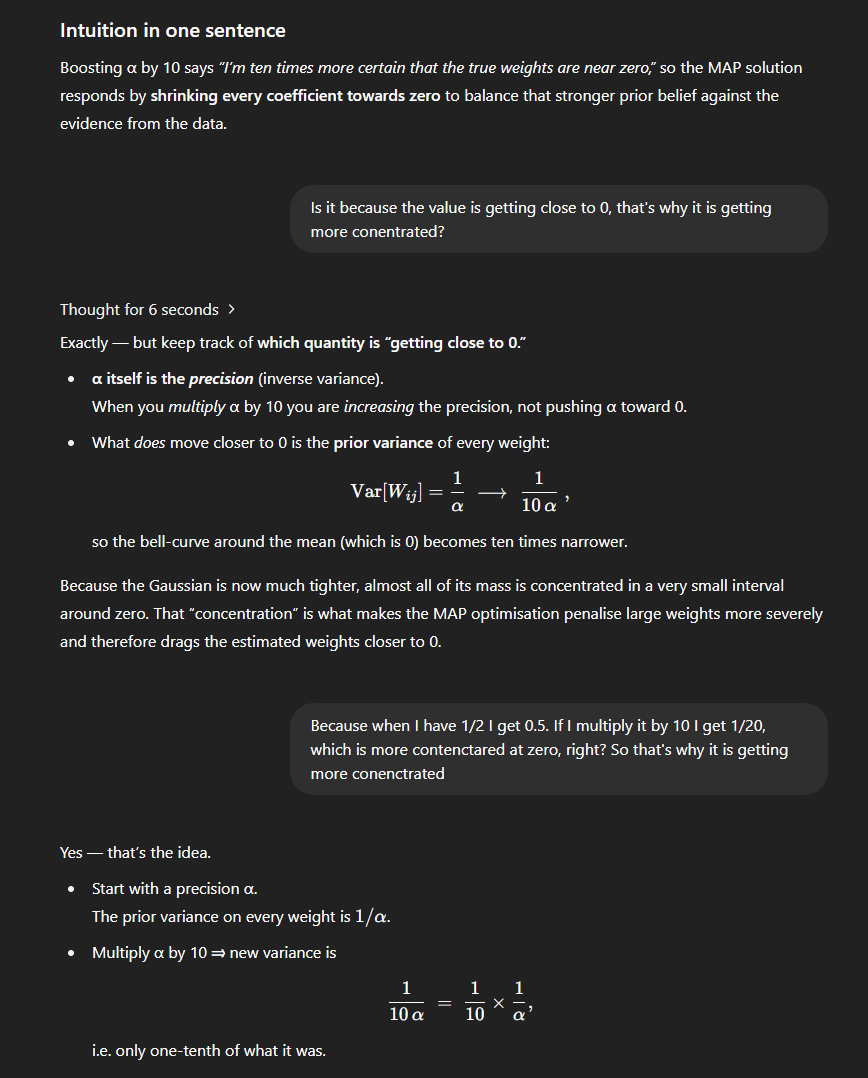

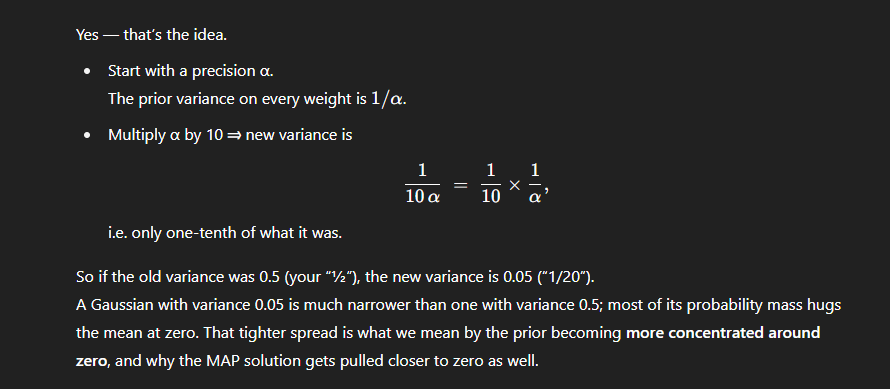